# In this class we will test some method like Z-score

In [1]:
import sys

In [2]:
sys.path.append('/home/ay/FullStackMLDataScience/Projects/ML_Project/')

### Evaluation

In [11]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    ShuffleSplit,
    TimeSeriesSplit
)

In [12]:
df = pd.read_csv('../data/placement.csv')

In [240]:
columns_list = df.columns[df.isna().any()].tolist()
columns_list

[]

In [270]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    ConfusionMatrixDisplay
)
import pandas as pd
import numpy as np

class ClassificationEvaluator:
    """
    A class for evaluating classification models using various metrics.

    Args:
    - y_true (array-like): The true labels.
    - y_pred (array-like): The predicted labels.

    Methods:
    - accuracy(): Compute the accuracy score.
    - precision(average=None): Compute the precision score.
    - recall(average=None): Compute the recall score.
    - f1_score(average=None): Compute the F1 score.
    - confusion_matrix(): Compute the confusion matrix.
    - roc_auc(average='macro'): Compute the ROC AUC score.
    - print_metrics_table(average=None):
        Print a table of all evaluation metrics.

    Example Usage:
    ```
    y_true = [0, 1, 0, 1, 1]
    y_pred = [0, 0, 1, 1, 1]

    evaluator = ClassificationEvaluator(y_true, y_pred)
    print("Accuracy:", evaluator.accuracy())
    print("Precision:", evaluator.precision())
    print("Recall:", evaluator.recall())
    print("F1 Score:", evaluator.f1_score())
    print("Confusion Matrix:")
    print(evaluator.confusion_matrix())
    evaluator.print_metrics_table()
    ```
    """

    def __init__(self, y_true, y_pred):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)

    def accuracy(self):
        return accuracy_score(self.y_true, self.y_pred)

    def precision(self, average=None):
        return precision_score(self.y_true, self.y_pred, average=average)

    def recall(self, average=None):
        return recall_score(self.y_true, self.y_pred, average=average)

    def f1_score(self, average=None):
        return f1_score(self.y_true, self.y_pred, average=average)

    def confusion_matrix(self):
        return confusion_matrix(self.y_true, self.y_pred)

    def roc_auc(self, average='macro', multi_class=None):
        return roc_auc_score(self.y_true, self.y_pred, average=average, multi_class=multi_class)

    def print_metrics_table(self, average=None, multi_class=None):
        metrics = {
            'Accuracy': self.accuracy(),
            'Precision': self.precision(average=average),
            'Recall': self.recall(average=average),
            'F1 Score': self.f1_score(average=average),
            #'ROC AUC': self.roc_auc(average=average, multi_class=multi_class)
        }
        df = pd.DataFrame(metrics) # , index=['Metrics']
        print(df)

    def plot_confusion_matrix(self, normalize=False, cmap='Blues'):
        """
        Plot the confusion matrix.

        Args:
        - normalize (bool, optional): Whether to normalize the confusion matrix. Default is False.
        - cmap (str or colormap, optional): The colormap to use. Default is 'Blues'.
        """
        cm = confusion_matrix(self.y_true, self.y_pred, normalize='true' if normalize else None)
        labels = np.unique(self.y_true)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=cmap)
        plt.title('Confusion Matrix')
        plt.show()

    def plot_confusion_matrix2(self, normalize: bool=False, cmap: str='Blues') -> None:
        """
        Plot the confusion matrix.

        Args:
            normalize (bool, optional): Whether to normalize the confusion matrix. Default is False.
            cmap (str, optional): The colormap to use for the plot. Default is 'Blues'.
        """
        cme = self.confusion_matrix()
        display = ConfusionMatrixDisplay(
            confusion_matrix=cme,
            display_labels=np.unique(self.y_true)
        )
        display.plot(
            include_values=True,
            cmap=cmap, ax=plt.gca(),
            xticks_rotation='horizontal'
        )
        plt.show()

Accuracy: 0.6
Precision: [0.5        0.66666667]
Recall: [0.5        0.66666667]
F1 Score: [0.5        0.66666667]
Confusion Matrix:
[[1 1]
 [1 2]]
   Accuracy  Precision    Recall  F1 Score
0       0.6   0.500000  0.500000  0.500000
1       0.6   0.666667  0.666667  0.666667


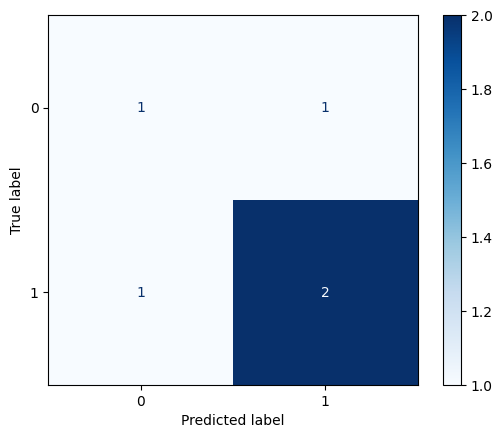

In [271]:
y_true = [0, 1, 0, 1, 1]
y_pred = [0, 0, 1, 1, 1]

evaluator = ClassificationEvaluator(y_true, y_pred)
print("Accuracy:", evaluator.accuracy())
print("Precision:", evaluator.precision())
print("Recall:", evaluator.recall())
print("F1 Score:", evaluator.f1_score())
print("Confusion Matrix:")
print(evaluator.confusion_matrix())
evaluator.print_metrics_table()
evaluator.plot_confusion_matrix2()

Accuracy: 1.0
Precision: [1. 1. 1.]
Recall: [1. 1. 1.]
F1 Score: [1. 1. 1.]
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
   Accuracy  Precision  Recall  F1 Score
0       1.0        1.0     1.0       1.0
1       1.0        1.0     1.0       1.0
2       1.0        1.0     1.0       1.0


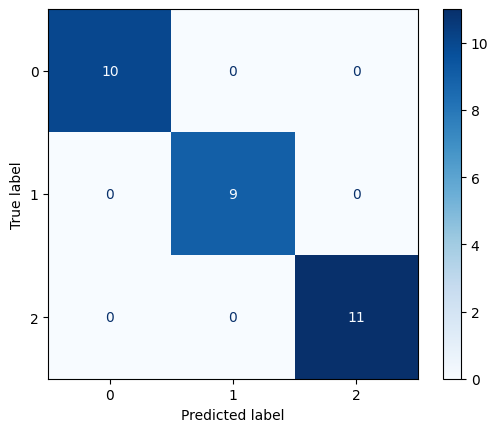

In [272]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

evaluator = ClassificationEvaluator(y_test, y_pred)
print("Accuracy:", evaluator.accuracy())
print("Precision:", evaluator.precision())
print("Recall:", evaluator.recall())
print("F1 Score:", evaluator.f1_score())
print("Confusion Matrix:")
print(evaluator.confusion_matrix())
evaluator.print_metrics_table()
evaluator.plot_confusion_matrix2()

In [290]:
import numpy as np
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    explained_variance_score,
)

class RegressionEvaluator:
    """
    A class for evaluating regression models using various metrics.

    Args:
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.

    Methods:
        mean_squared_error(): Compute the mean squared error.
        mean_absolute_error(): Compute the mean absolute error.
        r2_score(): Compute the coefficient of determination (R^2 score).
        explained_variance_score(): Compute the explained variance score.
        root_mean_squared_error(): Compute the root mean squared error.
        adjusted_r_squared(): Compute the adjusted R^2 score.
        print_metrics_table():
            Print a table of all evaluation metrics.

    Example Usage:
        >>> y_true = [2.5, 1.5, 3.2, 4.0, 2.8]
        >>> y_pred = [2.0, 1.8, 3.5, 3.9, 2.6]
        >>> evaluator = RegressionEvaluator(y_true, y_pred)
        >>> print("Mean Squared Error:", evaluator.mean_squared_error())
        >>> print("Mean Absolute Error:", evaluator.mean_absolute_error())
        >>> print("R^2 Score:", evaluator.r2_score())
        >>> print("Explained Variance Score:", evaluator.explained_variance_score())
        >>> print("Root Mean Squared Error:", evaluator.root_mean_squared_error())
        >>> print("Adjusted R^2 Score:", evaluator.adjusted_r_squared())
        >>> evaluator.print_metrics_table()
    """

    def __init__(self, y_true: np.ndarray, y_pred: np.ndarray):
        self.y_true = np.array(y_true)
        self.y_pred = np.array(y_pred)

    def mean_squared_error(self) -> float:
        """
        Compute the mean squared error.

        Returns:
            Mean squared error (float): The computed mean squared error.
        """
        return mean_squared_error(self.y_true, self.y_pred)

    def mean_absolute_error(self) -> float:
        """
        Compute the mean absolute error.

        Returns:
            Mean absolute error (float): The computed mean absolute error.
        """
        return mean_absolute_error(self.y_true, self.y_pred)

    def r2_score(self) -> float:
        """
        Compute the coefficient of determination (R^2 score).

        Returns:
            R^2 score (float): The computed coefficient of determination (R^2 score).
        """
        return r2_score(self.y_true, self.y_pred)

    def explained_variance_score(self) -> float:
        """
        Compute the explained variance score.

        Returns:
            Explained variance score (float): The computed explained variance score.
        """
        return explained_variance_score(self.y_true, self.y_pred)

    def root_mean_squared_error(self) -> float:
        """
        Compute the root mean squared error.

        Returns:
            Root mean squared error (float): The computed root mean squared error.
        """
        mse = self.mean_squared_error()
        return np.sqrt(mse)

    def adjusted_r_squared(self, num_features: int=None) -> float:
        """
        Compute the adjusted R^2 score.

        Returns:
            Adjusted R^2 score (float): The computed adjusted R^2 score.
        """
        if num_features is None:
            return None
        r2 = self.r2_score()
        n = len(self.y_true)
        p = num_features
        adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
        return adjusted_r2

    def print_metrics_table(self, num_features: int=None) -> None:
        """
        Print a table of all evaluation metrics.
        """
        metrics = [
            ('Mean Squared Error', self.mean_squared_error()),
            ('Mean Absolute Error', self.mean_absolute_error()),
            ('R^2 Score', self.r2_score()),
            ('Explained Variance Score', self.explained_variance_score()),
            ('Root Mean Squared Error', self.root_mean_squared_error()),
            ('Adjusted R^2 Score', self.adjusted_r_squared(num_features)),
        ]
        headers = ["Metric", "Value"]
        print(tabulate(metrics, headers=headers, tablefmt='fancy_grid'))

In [292]:
y_true = [2.5, 1.5, 3.2, 4.0, 2.8]
y_pred = [2.0, 1.8, 3.5, 3.9, 2.6]
evaluator = RegressionEvaluator(y_true, y_pred)
print("Mean Squared Error:", evaluator.mean_squared_error())
print("Mean Absolute Error:", evaluator.mean_absolute_error())
print("R^2 Score:", evaluator.r2_score())
print("Explained Variance Score:", evaluator.explained_variance_score())
print("Root Mean Squared Error:", evaluator.root_mean_squared_error())
print("Adjusted R^2 Score:", evaluator.adjusted_r_squared(10))
evaluator.print_metrics_table(10)

Mean Squared Error: 0.09599999999999997
Mean Absolute Error: 0.2799999999999999
R^2 Score: 0.8579881656804734
Explained Variance Score: 0.8603550295857989
Root Mean Squared Error: 0.3098386676965933
Adjusted R^2 Score: 1.0946745562130178
╒══════════════════════════╤══════════╕
│ Metric                   │    Value │
╞══════════════════════════╪══════════╡
│ Mean Squared Error       │ 0.096    │
├──────────────────────────┼──────────┤
│ Mean Absolute Error      │ 0.28     │
├──────────────────────────┼──────────┤
│ R^2 Score                │ 0.857988 │
├──────────────────────────┼──────────┤
│ Explained Variance Score │ 0.860355 │
├──────────────────────────┼──────────┤
│ Root Mean Squared Error  │ 0.309839 │
├──────────────────────────┼──────────┤
│ Adjusted R^2 Score       │ 1.09467  │
╘══════════════════════════╧══════════╛


### Splitter

In [328]:
class DataSplitter:
    """
    A class for splitting data using different techniques.

    Args:
        X (array-like): The feature matrix.
        y (array-like): The target variable.

    Methods:
        train_test_split_data(test_size=0.2, random_state=None):
            Split the data using train-test split technique.
        kfold_split_data(n_splits=5):
            Split the data using K-fold cross-validation technique.
        stratified_kfold_split_data(n_splits=5):
            Split the data using stratified K-fold cross-validation technique.
        shuffle_split_data(n_splits=5, test_size=0.2, random_state=None):
            Split the data using shuffle split technique.
        time_series_split_data(n_splits=5):
            Split the data using time series split technique.

    Returns:
        The split data: X_train, X_test, y_train, y_test

    Examples:
        >>> splitter = DataSplitter(X, y)
        >>> X_train, X_test, y_train, y_test = splitter.train_test_split_data(test_size=0.2)
        >>> kf_splits = splitter.kfold_split_data(n_splits=5)
        >>> skf_splits = splitter.stratified_kfold_split_data(n_splits=5)
        >>> shuffle_splits = splitter.shuffle_split_data(n_splits=5, test_size=0.2)
        >>> tscv_splits = splitter.time_series_split_data(n_splits=5)
    """

    def __init__(self,
        X: Union[pd.DataFrame, pd.Series, np.ndarray],
        y: Union[pd.Series, np.ndarray]
    ) -> None:
        """
        X (array-like): The feature matrix.
        y (array-like): The target variable.
        """
        self.X = X
        self.y = y

    def train_test_split_data(self, test_size: float = 0.2, random_state: int = 42) -> Tuple:
        """
        Split the data using train-test split technique.

        Args:
            test_size (float, optional): The proportion of the data to include in the test split.
                Default is 0.2 (20%).
            random_state (int, optional): The seed used by the random number generator.
                Default is None.

        Returns:
            Tuple: The split data: X_train, X_test, y_train, y_test
        """
        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state
        )
        return X_train, X_test, y_train, y_test

    def kfold_split_data(self, n_splits: int) -> List[Tuple]:
        """
        Split the data into K folds for cross-validation.
    
        Args:
            n_splits (int): The number of folds to create.
    
        Returns:
            List[Tuple]: A list of K folds, each containing the split data: (X_train, X_test, y_train, y_test).
        """
        kfold = KFold(n_splits=n_splits)
        splits = []
        for train_index, test_index in kfold.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            splits.append((X_train, X_test, y_train, y_test))
        return splits
    
    def stratified_kfold_split_data(self, n_splits: int = 5) -> List[Tuple]:
        """
        Split the data using stratified K-fold cross-validation technique.

        Args:
            n_splits (int, optional): The number of folds to create. Default is 5.

        Returns:
            List[Tuple]: List of tuples containing the split data:
                X_train, X_test, y_train, y_test for each fold.
        """
        skf = StratifiedKFold(n_splits=n_splits)
        splits = []
        for train_index, test_index in skf.split(self.X, self.y):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            splits.append((X_train, X_test, y_train, y_test))
        return splits

    def shuffle_split_data(self,
        n_splits: int = 5, test_size: float = 0.2,
        random_state: int = 42
    ) -> List[Tuple]:
        """
        Split the data using shuffle split technique.

        Args:
            n_splits (int, optional): The number of re-shuffling and splitting iterations.
                Default is 5.
            test_size (float, optional): The proportion of the data to include in the test split.
                Default is 0.2 (20%).
            random_state (int, optional): The seed used by the random number generator.
                Default is None.

        Returns:
            List[Tuple]: List of tuples containing the split data:
                X_train, X_test, y_train, y_test for each iteration.
        """
        shflts = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)
        splits = []
        for train_index, test_index in shflts.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            splits.append((X_train, X_test, y_train, y_test))
        return splits

    def time_series_split_data(self, n_splits: int = 5) -> List[Tuple]:
        """
        Split the data using time series split technique.

        Args:
            n_splits (int, optional): The number of splits. Default is 5.

        Returns:
            List[Tuple]: List of tuples containing the split data:
                X_train, X_test, y_train, y_test for each split.
        """
        tscv = TimeSeriesSplit(n_splits=n_splits)
        splits = []
        for train_index, test_index in tscv.split(self.X):
            X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
            y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]
            splits.append((X_train, X_test, y_train, y_test))
        return splits

In [297]:
DataSplitter?

Init signature:
DataSplitter(
    X: Union[pandas.core.frame.DataFrame, pandas.core.series.Series, numpy.ndarray],
    y: Union[pandas.core.series.Series, numpy.ndarray],
) -> None
Docstring:     
A class for splitting data using different techniques.

Args:
    X (array-like): The feature matrix.
    y (array-like): The target variable.

Methods:
    train_test_split_data(test_size=0.2, random_state=None):
        Split the data using train-test split technique.
    kfold_split_data(n_splits=5):
        Split the data using K-fold cross-validation technique.
    stratified_kfold_split_data(n_splits=5):
        Split the data using stratified K-fold cross-validation technique.
    shuffle_split_data(n_splits=5, test_size=0.2, random_state=None):
        Split the data using shuffle split technique.
    time_series_split_data(n_splits=5):
        Split the data using time series split technique.

Returns:
    The split data: X_train, X_test, y_train, y_test

Examples:
    >>> splitter =

In [330]:
spliter = DataSplitter(df.drop(columns=['placed']), df['placed'])

In [331]:
X_train, X_test, y_train, y_test = spliter.train_test_split_data(random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


In [332]:
spliter = DataSplitter(df.drop(columns=['placed']), df['placed'])
for data in spliter.kfold_split_data(n_splits=5):
    print("gg")

gg
gg
gg
gg
gg


In [336]:
for data in spliter.stratified_kfold_split_data():
    print("gg")

gg
gg
gg
gg
gg


### Exploration

In [51]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


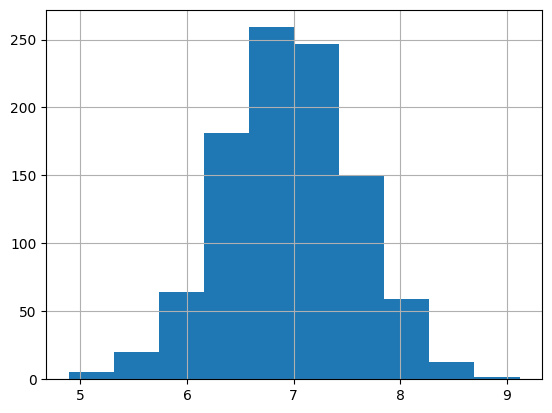

In [175]:
df.cgpa.hist();

<Axes: >

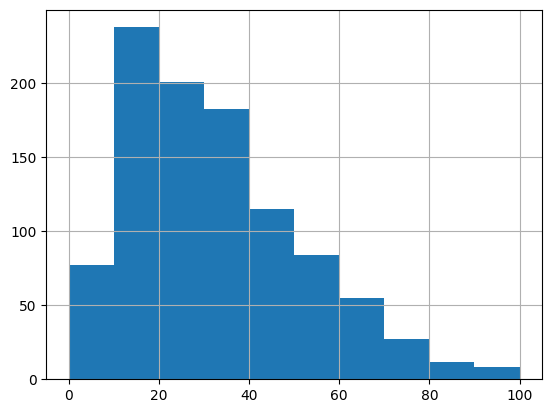

In [176]:
df.placement_exam_marks.hist()

<Axes: >

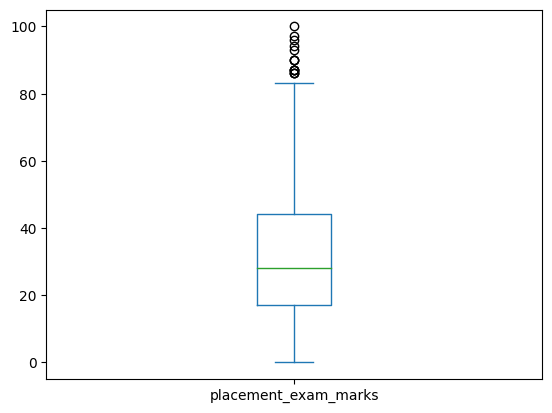

In [177]:
df.placement_exam_marks.plot(kind="box")

In [178]:
handler = OutlierHandler(strategy="transformer", transformer="sqrt")

<Axes: >

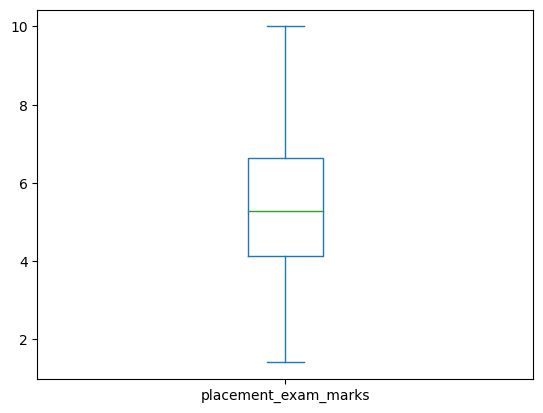

In [179]:
trsn_df = handler.transform(df['placement_exam_marks'].to_frame())
trsn_df.query("placement_exam_marks != 0").plot(kind="box")

In [180]:
trsn_df.shape, trsn_df.query("placement_exam_marks != 0").shape

((1000, 1), (999, 1))

In [181]:
trsn_df.quantile([0.001, 1])

,placement_exam_marks
0.001,1.412799
1.000,10.000000


In [182]:
handler = OutlierHandler(strategy="remove", quantile_range=[0.001, 1])
df_remove = handler.transform(trsn_df)

In [183]:
df_remove.quantile([0, 1])

,placement_exam_marks
0.0,1.414214
1.0,10.000000


<Axes: >

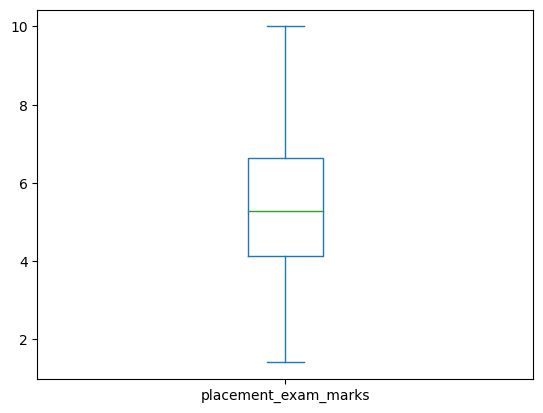

In [184]:
df_remove.plot(kind="box")

In [185]:
df.placement_exam_marks.skew()

0.8356419499466834

In [186]:
trsn_df.placement_exam_marks.skew()

0.18023273985417204

In [187]:
df_remove.skew()

placement_exam_marks    0.206972
dtype: float64

array([[<Axes: title={'center': 'placement_exam_marks'}>]], dtype=object)

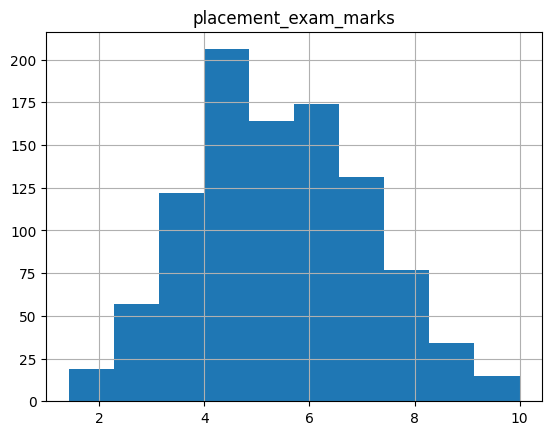

In [188]:
df_remove.hist()

### PipeLine

In [25]:
from sklearn.compose import ColumnTransformer

In [201]:
handler_sqrt = OutlierHandler(strategy="transformer", transformer="sqrt", inplace=True)
handler_remove = OutlierHandler(strategy="remove", quantile_range=[0.001, 0.999], inplace=True)

In [202]:
pipeline = make_pipeline([
    ('handler_sqrt', handler_sqrt),
    ('handler_remove', handler_remove),
])

In [ ]:
pipeline.fit_transform(df)

In [220]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [30]:
from sklearn.pipeline import Pipeline
# Step 3: Remove outliers from specific columns
handler_sqrt = OutlierHandler(strategy='transformer', transformer='sqrt')
handler_remove = OutlierHandler(strategy='remove', quantile_range=[0.001, 0.999])
handler_winsorization = OutlierHandler(strategy='statistics', statistics="winsorization")

outlier_handlers = [
    ('handler_sqrt', handler_sqrt, 'placement_exam_marks'),
    ('handler_winsorization', handler_winsorization, 'cgpa')
]

outlier_transformer = ColumnTransformer(outlier_handlers)

# Step 4: Scale the data

# Create the pipeline
pipeline = Pipeline([
    # ('handler_sqrt', handler_sqrt),
    # ('handler_winsorization', handler_winsorization),
    ('outlier_handlers', outlier_transformer),
    ('scaler', Scaler())
])

X_processed = pipeline.fit_transform(df)



[2023-07-05 19:55:03,315] - root - INFO - Transform data for handling outlier with transformer
[2023-07-05 19:55:03,321] - root - INFO - Transform data for handling outlier with statistics


In [31]:
X_processed

array([[-0.19034828,  0.42696465],
       [ 0.44110489,  0.87675535],
       [ 0.53601972,  1.01002667],
       ...,
       [ 0.24346382, -2.2891048 ],
       [ 0.80734012, -2.2891048 ],
       [-1.33824399, -2.2891048 ]])

In [23]:
from src.data.preparation import Scaler, OutlierHandler

In [ ]:
from sklearn.pipeline import Pipeline
# Step 3: Remove outliers from specific columns
handler_sqrt = OutlierHandler(strategy='transformer', transformer='sqrt')
handler_remove = OutlierHandler(strategy='remove', quantile_range=[0.001, 0.999])
handler_winsorization = OutlierHandler(strategy='statistics', statistics="winsorization")


trasf_sqrt = ColumnTransformer([
    ('handler_sqrt', handler_sqrt, 'placement_exam_marks')
])
tranf_win = ColumnTransformer([
    ('handler_winsorization', handler_winsorization, 'cgpa')
])

# Step 4: Scale the data

# Create the pipeline
pipeline = Pipeline([
    ('handler_sqrt', trasf_sqrt),
    ('handler_winsorization', tranf_win),
    ('scaler', 'passthrough')
])

X_processed = pipeline.fit_transform(df)


In [33]:
[10] + [5]

[10, 5]

In [231]:
X_processed

array([[5.09901951, 7.19      ],
       [6.164414  , 7.46      ],
       [6.32455532, 7.54      ],
       ...,
       [5.83095189, 5.5596    ],
       [6.78232998, 5.5596    ],
       [3.16227766, 5.5596    ]])

In [233]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [168]:
prepross = ColumnTransformer(
    [
        ("OutlierHandler", handler_sqrt, 'placement_exam_marks'),
       ("OutlierHandler1", handler_remove, 'placement_exam_marks')
    ]
)

In [ ]:
df_copy = df.copy()
X = prepross.fit_transform(df_copy)

In [158]:
df_copy_sqrt = df_copy.copy()
df_copy_remove = df_copy.copy()

In [164]:
handler_sqrt = OutlierHandler(strategy="transformer", transformer="sqrt", inplace=True)
handler_remove = OutlierHandler(strategy="remove", quantile_range=[0.001, 0.999], inplace=True)
df_copy_sqrt['placement_exam_marks'] = handler_sqrt.transform(df_copy_sqrt[['placement_exam_marks']])
df_copy_remove['placement_exam_marks_re'] = handler_remove.transform(df_copy_remove[['placement_exam_marks']])


In [165]:
# Combine the two datasets
df_combined = pd.concat([df_copy_sqrt, df_copy_remove], axis=1)
df_combined.head()

,cgpa,placement_exam_marks,placed,cgpa,placement_exam_marks,placed,placement_exam_marks_re
0,7.19,1.502698,1,7.19,5.099020,1,5.099020
1,7.46,1.575698,1,7.46,6.164414,1,6.164414
2,7.54,1.585833,1,7.54,6.324555,1,6.324555
3,6.42,1.296840,1,6.42,2.828427,1,2.828427
4,7.23,1.424971,0,7.23,4.123106,0,4.123106


In [ ]:
# Define the ColumnTransformer
prepross = ColumnTransformer(
    [
        ("OutlierHandler", 'passthrough', ['placement_exam_marks']),
        ("OutlierHandler1", 'passthrough', ['placement_exam_marks'])
    ]
)

# Apply the transformation
X = prepross.fit_transform(df_combined)

In [114]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

In [115]:
df[['cgpa', 'placement_exam_marks']]

,cgpa,placement_exam_marks
0,7.19,26.0
1,7.46,38.0
2,7.54,40.0
3,6.42,8.0
4,7.23,17.0
...,...,...
995,8.87,44.0
996,9.12,65.0
997,4.89,34.0
998,8.62,46.0


In [133]:
df_boxcox = df.query('placement_exam_marks > 0')['placement_exam_marks']
df_boxcox

0      26.0
1      38.0
2      40.0
3       8.0
4      17.0
       ... 
995    44.0
996    65.0
997    34.0
998    46.0
999    10.0
Name: placement_exam_marks, Length: 999, dtype: float64

In [140]:
df_boxcox.name

'placement_exam_marks'

In [143]:
fff = _transform_with_transformer(df_boxcox, "boxcox")
fff
# transformer = FunctionTransformer()
# transformer.func = boxcox
# transformed_data, _ = transformer.transform(df_boxcox)
# transformed_data

,placement_exam_marks
0,5.829999
1,7.007438
2,7.178135
3,2.982262
4,4.674548
...,...
995,7.503047
996,8.944473
997,6.647020
998,7.658093


### data preparation in model ML with pandas

In [227]:
"""file for assure data preparation in model ML with pandas"""

from typing import Union, Tuple, Dict, List
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
import logging
from scipy.stats import boxcox
from sklearn.base import BaseEstimator, TransformerMixin
from enum import Enum
#import datawig

class ParamsConstraints(Enum):
    """Class for store data for parametres_contraints
    """
    STRATEGY_KEY: str = "strategy"
    TRANSFORMER_KEY: str = "transformer"
    STATISTICS_KEY: str = "statistics"
    PARAM_GRID_KEY: str = "param_grid"
    STRATEGY_TRANSFORMER: str = "transformer"
    STRATEGY_STATISTICS: str = "statistics"
    STRATEGY_RANDOM_FOREST: str = "random_forest"
    STRATEGY_ZSCORE: str = "zscore"
    STRATEGY_REMOVE: str = "remove"
    TRANSFORMER_LOG: str = "log"
    TRANSFORMER_SQRT: str = "sqrt"
    TRANSFORMER_BOXCOX: str = "boxcox"
    STATISTICS_MEDIAN: str = "median"
    STATISTICS_TRIMMED_MEAN: str = "trimmed_mean"
    STATISTICS_WINSORIZATION: str = "winsorization"
    PARAM_GRID_N_ESTIMATORS: str = "n_estimators"
    PARAM_GRID_MAX_DEPTH: str = "max_depth"
    PARAM_GRID_MIN_SAMPLES_SPLIT: str = "min_samples_split"

class OutlierHandler(BaseEstimator, TransformerMixin):
    """Class for handling outliers"""
    _parameter_constraints: Dict[str, List[str]] = {
        ParamsConstraints.STRATEGY_KEY.value: [
            ParamsConstraints.STRATEGY_TRANSFORMER.value,
            ParamsConstraints.STRATEGY_STATISTICS.value,
            ParamsConstraints.STRATEGY_RANDOM_FOREST.value,
            ParamsConstraints.STRATEGY_ZSCORE.value,
            ParamsConstraints.STRATEGY_REMOVE.value,
        ],
        ParamsConstraints.TRANSFORMER_KEY.value: [
            ParamsConstraints.TRANSFORMER_LOG.value,
            ParamsConstraints.TRANSFORMER_SQRT.value,
        ],
        ParamsConstraints.STATISTICS_KEY.value: [
            ParamsConstraints.STATISTICS_MEDIAN.value,
            ParamsConstraints.STATISTICS_TRIMMED_MEAN.value,
            ParamsConstraints.STATISTICS_WINSORIZATION.value,
        ],
        ParamsConstraints.PARAM_GRID_KEY.value: [
            ParamsConstraints.PARAM_GRID_N_ESTIMATORS.value,
            ParamsConstraints.PARAM_GRID_MAX_DEPTH.value,
            ParamsConstraints.PARAM_GRID_MIN_SAMPLES_SPLIT.value,
        ],
    }


    def __init__(
        self,
        strategy: str = "transformer",
        transformer: str = "log",
        statistics:str = None,
        threshold:float = 0.0,
        quantile_range: Tuple[float, float] = (0.05, 0.95),
        param_grid: Union[Dict[str, List[Union[int, float]]], None] = None,
        inplace = False
    ) -> None:
        """ Init class OutlierHandler

        Args:
            strategy (str, optional): _description_. Defaults to "transformer".
            transformer (str, optional): _description_. Defaults to "log".
            statistics (str, optional): _description_. Defaults to None.
            threshold (float, optional): _description_. Defaults to 0.0.
        """
        self.strategy = strategy
        self.transformer = transformer
        self.statistics = statistics
        self.threshold = threshold
        self.quantile_range = quantile_range
        self.param_grid = param_grid
        self.inplace = inplace
        self._validate_parameters()


    def _validate_input(self, **kwargs):
        """For validate input"""
        # validate data we will transfrom
        data = kwargs.get("data")
        if data is None or (
            isinstance(data, pd.DataFrame) and data.empty
        ) or (
            isinstance(data, pd.Series) and data.empty
        ) or (
            isinstance(data, np.ndarray) and data.size == 0
        ):
            raise ValueError("Invalid data. Data is None or empty")

        # validate and check data for the method `"random_forest"`
        if self.strategy == ParamsConstraints.STRATEGY_RANDOM_FOREST.value:
            target = kwargs.get("target")
            if target is None:
                raise ValueError("Invalid target. Traget is None")
            if target.empty:
                raise ValueError("Invalid target. Traget is empty")
            if not isinstance(target, (np.ndarray, pd.Series)):
                raise ValueError("Invalid data. Target is not a 1D array or a Pandas Series.")
            param_grid = kwargs.get(param_grid)
            if param_grid is not None:
                if not isinstance(param_grid, dict):
                    raise ValueError("Invalid param_grid. param_grid must be dict")
                if set(param_grid.keys()) != \
                    set(self._parameter_constraints[ParamsConstraints.PARAM_GRID_KEY.value]):
                    valid_statist = ", ".join(
                        self._parameter_constraints[ParamsConstraints.PARAM_GRID_KEY.value]
                    )
                    raise ValueError(f"Invalid param_grid: {param_grid}. Supported {valid_statist}")
                for value in param_grid.values():
                    if not isinstance(value, (list, int)):
                        raise ValueError\
                            (f"Invalid param_grid: {param_grid} type of values isn't int or list")


    def _validate_parameters(self, **kwargs):
        """Valid & check the parameters for invalid values.

        Args:
            **kwargs: Additional keyword arguments.

        Raises:
            ValueError: If any of the parameters is invalid or missing.
        """

        # Validate strategy
        if self.strategy not in self._parameter_constraints[ParamsConstraints.STRATEGY_KEY.value]:
            valid_strategies = ", "\
                .join(self._parameter_constraints[ParamsConstraints.STRATEGY_KEY.value])
            raise ValueError(f"Invalid strategy: '{self.strategy}'. Supported: {valid_strategies}")

        # Validate transformer
        if self.strategy == ParamsConstraints.TRANSFORMER_KEY.value:
            if self.transformer not in self.\
                _parameter_constraints[ParamsConstraints.TRANSFORMER_KEY.value]:
                vld_tr = ", ".join(
                    self._parameter_constraints[ParamsConstraints.TRANSFORMER_KEY.value]
                )
                raise ValueError(f"Invalid transformer: '{self.transformer}'. Supported: {vld_tr}")

        # Validate statistics
        if self.strategy == ParamsConstraints.STATISTICS_KEY.value:
            if self.statistics not in self.\
                _parameter_constraints[ParamsConstraints.STATISTICS_KEY.value]:
                vald_stst = ", "\
                    .join(self._parameter_constraints[ParamsConstraints.STATISTICS_KEY.value])
                raise ValueError(f"Invalid statistics: '{self.statistics}'. Supported: {vald_stst}")
        # validate z-score
        if self.strategy == ParamsConstraints.STRATEGY_ZSCORE.value:
            threshold = kwargs.get("threshold")
            MIN_THRESHOLD = 0
            MAX_THRESHOLD = 10
            if not MIN_THRESHOLD < threshold < MAX_THRESHOLD:
                raise ValueError(f"Threshold must be between {MIN_THRESHOLD} and {MAX_THRESHOLD}.")
        # validate range quantiles
        if self.strategy == ParamsConstraints.STRATEGY_REMOVE.value:
            MIN_Q_RANGE = 0.0
            MAX_Q_RANGE = 1.1           
            lower_quantile, upper_quantile = self.quantile_range
            if not MIN_Q_RANGE <= lower_quantile < upper_quantile < MAX_Q_RANGE:
                raise ValueError(f"Quantile_range must be between {MIN_Q_RANGE} and {MAX_Q_RANGE}")


    def fit(
        self, data: pd.DataFrame,
        target: pd.Series=None
    ):
        """ fit
        """
        self._validate_input(data=data, target=target)
        return self


    def transform(
        self,
        data: Union[pd.DataFrame, pd.Series],
        target: pd.Series=None
    ) -> pd.DataFrame:
        """
        Apply outlier handling methods to the input DataFrame.

        Args:
            data (pd.DataFrame): The input DataFrame.
            target (pd.Series): The input DataFrame.

        Returns:
            pd.DataFrame: The DataFrame with outliers handled.
        """
        logging.info(f"Transform data for handling outlier with {self.strategy}")
        if self.inplace:
            dataframe = data
        else:
            dataframe = data.copy()
        self._validate_input(data=dataframe, target=target)
        if self.strategy == ParamsConstraints.STRATEGY_TRANSFORMER.value:
            return self._transform_with_transformer(dataframe)
        if self.strategy == ParamsConstraints.STRATEGY_STATISTICS.value:
            return self._transform_with_statistics(dataframe)
        if self.strategy == ParamsConstraints.STRATEGY_RANDOM_FOREST.value:
            return self._transform_with_random_forest(dataframe, target)
        if self.strategy == ParamsConstraints.STRATEGY_ZSCORE.value:
            return self._transform_with_zscore(dataframe)
        if self.strategy == ParamsConstraints.STRATEGY_REMOVE.value:
            return self._transform_with_remove(dataframe)
        raise ValueError("The strategy doesn't exist")

    def _transform_with_transformer(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        Transform the data using a specified method.

        Args:
            data (pd.DataFrame): Data Frame.

        Returns:
            pd.DataFrame: The transformed DataFrame.
        """

        transformer = FunctionTransformer()
        if self.transformer == ParamsConstraints.TRANSFORMER_LOG.value:
            transformer.func = np.log
        elif self.transformer == ParamsConstraints.TRANSFORMER_SQRT.value:
            transformer.func = np.sqrt
        elif self.transformer == ParamsConstraints.TRANSFORMER_BOXCOX.value:
            transformer.func = boxcox
        else:
            raise ValueError("Invalid transformation method.")

        if self.transformer == ParamsConstraints.TRANSFORMER_BOXCOX.value:
            transformed_data, _ = transformer.transform(data)
        else:
            transformed_data = transformer.transform(data)

        if isinstance(data, pd.DataFrame):
            transformed_data = pd.DataFrame(transformed_data, columns=data.columns)
        if isinstance(data, pd.Series):
            transformed_data = pd.Series(transformed_data, index=data.index)\
                .to_frame(name=data.name)
        return transformed_data

    def _transform_with_statistics(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        Apply robust statistical methods to handle outliers.
            - Supported: 'median', 'trimmed_mean', 'winsorization'.

        Args:
            data (pd.DataFrame): The DataFrame from which outliers will be removed.

        Returns:
            pd.DataFrame: The DataFrame with outliers handled using the specified method.
        """
        if isinstance(data, pd.DataFrame):
            if self.statistics == ParamsConstraints.STATISTICS_MEDIAN.value:
                data = data.fillna(data.median())
            elif self.statistics == ParamsConstraints.STATISTICS_TRIMMED_MEAN.value:
                quantiles = data.quantile([0.05, 0.95])
                for column in data.columns:
                    lower_quantile = quantiles.loc[0.05, column]
                    upper_quantile = quantiles.loc[0.95, column]
                    mask = (
                        (data[column] < lower_quantile) \
                            | (data[column] > upper_quantile)
                    )
                    data.loc[mask, column] = dataframe_copy[column].median()
            elif self.statistics == ParamsConstraints.STATISTICS_WINSORIZATION.value:
                winsorized_data = data.copy()
                quantiles = winsorized_data.quantile([0.01, 0.99])
                for column in data.columns:
                    lower_quantile = quantiles.loc[0.01, column]
                    upper_quantile = quantiles.loc[0.99, column]
                    mask = (
                        (winsorized_data[column] < lower_quantile) \
                            | (winsorized_data[column] > upper_quantile)
                    )
                    winsorized_data.loc[mask, column] = lower_quantile
                data = winsorized_data
        elif isinstance(data, pd.Series):
            if self.statistics == ParamsConstraints.STATISTICS_MEDIAN.value:
                data = data.fillna(data.median()).to_frame(name=data.name)
            elif self.statistics == ParamsConstraints.STATISTICS_TRIMMED_MEAN.value:
                lower_quantile, upper_quantile = data.quantile([0.05, 0.95])
                mask = (data < lower_quantile) | (data > upper_quantile)
                data.loc[mask] = data.median()
                data = data.to_frame(name=data.name)
            elif self.statistics == ParamsConstraints.STATISTICS_WINSORIZATION.value:
                winsorized_data = data.copy()
                lower_quantile, upper_quantile = winsorized_data.quantile([0.01, 0.99])
                mask = (winsorized_data < lower_quantile) | (winsorized_data > upper_quantile)
                winsorized_data.loc[mask] = lower_quantile
                data = winsorized_data.to_frame(name=data.name)
        else:
            raise ValueError("Invalid data type. Expected pd.DataFrame or pd.Series.")

        return data

    def _transform_with_random_forest(
        self, data: pd.DataFrame,
        target:pd.Series,
    ) -> pd.DataFrame:
        """
        Apply random forest algorithm to handle outliers.

        Args:
            data (pd.DataFrame): The DataFrame from which outliers will be removed.
            target (pd.Series): The target variable Series.

        Returns:
            pd.DataFrame: The DataFrame with outliers handled using random forest.
        """
        target_na_mask = data.isna()

        x_train = data[~target_na_mask]
        y_train = target[~target_na_mask]
        x_test = data[target_na_mask]

        rdf = RandomForestRegressor()
        self.param_grid = self.param_grid or {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, None],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(rdf, self.param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(x_train, y_train)
        best_rf = grid_search.best_estimator_
        predicted_values = best_rf.predict(x_test)
        data.loc[target_na_mask, data.columns] = predicted_values

        return data

    def _transform_with_zscore(self, data: pd.DataFrame) -> pd.DataFrame:
        """
        Apply the Z-score method to handle outliers.

        Args:
            data (pd.DataFrame): The DataFrame from which outliers will be removed.

        Returns:
            pd.DataFrame: The DataFrame with outliers handled using the Z-score method.
        """
        z_scores = (data - data.mean()) / data.std()
        outlier_mask = (z_scores.abs() > self.threshold)
        data[outlier_mask] = np.nan

        return data

    def _transform_with_remove(
        self,
        data: pd.DataFrame,
    ) -> pd.DataFrame:
        """
        Remove outliers from the DataFrame using Quantiles.

        Args:
            data (pd.DataFrame): The DataFrame from which outliers will be removed.

        Returns:
            pd.DataFrame: The DataFrame with outliers removed.
        """
        if isinstance(data, pd.DataFrame):
            lower_quantile, upper_quantile = self.quantile_range
            for column in data.select_dtypes("number").columns:
                low, high = data[column].quantile([lower_quantile, upper_quantile])
                mask_outliers = data[column].between(low, high)
                data = data[mask_outliers]
        elif isinstance(data, pd.Series):
            lower_quantile, upper_quantile = self.quantile_range
            low, high = data.quantile([lower_quantile, upper_quantile])
            mask_outliers = data.between(low, high)
            data = data[mask_outliers].to_frame(name=data.name)
        else:
            raise ValueError("Invalid data type. Expected pd.DataFrame or pd.Series.")
        return data


### Pipelines With YAML

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [57]:
df

,cgpa,placement_exam_marks,placed,placed_cat
0,7.19,26.0,1,True
1,7.46,38.0,1,True
2,7.54,40.0,1,True
3,6.42,8.0,1,True
4,7.23,17.0,0,False
...,...,...,...,...
995,8.87,44.0,1,True
996,9.12,65.0,1,True
997,4.89,34.0,0,False
998,8.62,46.0,1,True


In [56]:
df['placed_cat'] = df['placed'] == 1

In [54]:
ff = ColumnTransformer(
    [("ff", StandardScaler(), ['cgpa'])]
)

In [59]:
ff = ColumnTransformer(
    [("ff", StandardScaler(), ['cgpa'])]
)
cgpa = Pipeline(
    steps=[
        ('pip_cgpa', ff)
    ]
)
tt = ColumnTransformer(
    [("tt", OneHotEncoder(), ['placed_cat'])]
)
placed_cat = Pipeline(
    steps=[
        ('pip_placed_cat', tt)
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("placed_cat", placed_cat),
        ("cgpa", cgpa),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
clf.fit(df.drop(columns="placed"), df['placed'])

In [58]:
tt = ColumnTransformer(
    [("tt", OneHotEncoder(), ['placed_cat'])]
)

In [60]:
placed_cat = Pipeline(
    steps=[
        ('pip_placed_cat', tt)
    ]
)

In [63]:
preprocessor = ColumnTransformer(
    transformers=[
        ("placed_cat", placed_cat),
        ("cgpa", cgpa),
    ]
)

In [64]:
preprocessor

ColumnTransformer(transformers=[('placed_cat',
                                 Pipeline(steps=[('pip_placed_cat',
                                                  ColumnTransformer(transformers=[('tt',
                                                                                   OneHotEncoder(),
                                                                                   ['placed_cat'])]))])),
                                ('cgpa',
                                 Pipeline(steps=[('pip_cgpa',
                                                  ColumnTransformer(transformers=[('ff',
                                                                                   StandardScaler(),
                                                                                   ['cgpa'])]))]))])

In [65]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [66]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('placed_cat',
                                                  Pipeline(steps=[('pip_placed_cat',
                                                                   ColumnTransformer(transformers=[('tt',
                                                                                                    OneHotEncoder(),
                                                                                                    ['placed_cat'])]))])),
                                                 ('cgpa',
                                                  Pipeline(steps=[('pip_cgpa',
                                                                   ColumnTransformer(transformers=[('ff',
                                                                                                    StandardScaler(),
                                                                                                    ['cgpa'])]))]))])),
                ('classifier', LogisticRegression())])

In [ ]:
clf.fit(df.drop(columns="placed"), df['placed'])

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from src.data.preparation import OutlierHandler
# ff = ColumnTransformer(
#     [("ff", StandardScaler(), ['cgpa'])]
# )
# cgpa = Pipeline(
#     steps=[
#         ('pip_cgpa', ff)
#     ]
# )
# tt = ColumnTransformer(
#     [("tt", OneHotEncoder(), ['placed_cat'])]
# )
# placed_cat = Pipeline(
#     steps=[
#         ('pip_placed_cat', tt)
#     ]
# )
preprocessor = ColumnTransformer(
    transformers=[
        ("placed_cat", OutlierHandler(transformer='sqrt'), ['placement_exam_marks']),
        ("cgpa_wind", OutlierHandler(strategy='statistics', statistics='winsorization'), ['cgpa']),
        ("cgpa", StandardScaler(), ['cgpa']),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)
clf.fit(df.drop(columns="placed"), df['placed'])


[2023-07-06 09:14:23,210] - root - INFO - Transform data for handling outlier with transformer
[2023-07-06 09:14:23,214] - root - INFO - Transform data for handling outlier with statistics


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('placed_cat',
                                                  OutlierHandler(transformer='sqrt'),
                                                  ['placement_exam_marks']),
                                                 ('cgpa_wind',
                                                  OutlierHandler(statistics='winsorization',
                                                                 strategy='statistics'),
                                                  ['cgpa']),
                                                 ('cgpa', StandardScaler(),
                                                  ['cgpa'])])),
                ('classifier', LogisticRegression())])

In [86]:
clf.named_steps.classifier.coef_

array([[-0.04143464, -0.39313333,  0.26103663]])

In [87]:
clf.named_steps.classifier.n_features_in_

3

In [88]:
with open('../articfacts/models/transform_pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

In [89]:
pipeline

ColumnTransformer(transformers=[('OutlierHandler_1',
                                 OutlierHandler(transformer='sqrt'),
                                 ['placement_exam_marks']),
                                ('OutlierHandler_2',
                                 OutlierHandler(statistics='winsorization',
                                                strategy='statistics'),
                                 ['cgpa']),
                                ('Scaler_3',
                                 Scaler(method=<ScalerOptions.ROBUST: 'robust'>),
                                 ['placement_exam_marks', 'cgpa'])])

In [90]:
clf = Pipeline(
    steps=[("preprocessor", pipeline), ("classifier", LogisticRegression())]
)
clf.fit(df.drop(columns="placed"), df['placed'])

[2023-07-06 09:27:28,245] - root - INFO - Transform data for handling outlier with transformer
[2023-07-06 09:27:28,250] - root - INFO - Transform data for handling outlier with statistics


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OutlierHandler_1',
                                                  OutlierHandler(transformer='sqrt'),
                                                  ['placement_exam_marks']),
                                                 ('OutlierHandler_2',
                                                  OutlierHandler(statistics='winsorization',
                                                                 strategy='statistics'),
                                                  ['cgpa']),
                                                 ('Scaler_3',
                                                  Scaler(method=<ScalerOptions.ROBUST: 'robust'>),
                                                  ['placement_exam_marks',
                                                   'cgpa'])])),
                ('classifier', LogisticRegression())])

In [80]:
preprocessor

ColumnTransformer(transformers=[('placed_cat',
                                 OutlierHandler(transformer='sqrt'),
                                 ['placement_exam_marks']),
                                ('cgpa', StandardScaler(), ['cgpa'])])

In [92]:
pipeline.fit_transform(df.drop(columns="placed"))

[2023-07-06 10:11:09,878] - root - INFO - Transform data for handling outlier with transformer
[2023-07-06 10:11:09,891] - root - INFO - Transform data for handling outlier with statistics


array([[ 5.09901951,  7.19      , -0.07407407,  0.2804878 ],
       [ 6.164414  ,  7.46      ,  0.37037037,  0.6097561 ],
       [ 6.32455532,  7.54      ,  0.44444444,  0.70731707],
       ...,
       [ 5.83095189,  5.5596    ,  0.22222222, -2.52439024],
       [ 6.78232998,  5.5596    ,  0.66666667,  2.02439024],
       [ 3.16227766,  5.5596    , -0.66666667, -2.51219512]])

In [93]:
df

,cgpa,placement_exam_marks,placed,placed_cat
0,7.19,26.0,1,True
1,7.46,38.0,1,True
2,7.54,40.0,1,True
3,6.42,8.0,1,True
4,7.23,17.0,0,False
...,...,...,...,...
995,8.87,44.0,1,True
996,9.12,65.0,1,True
997,4.89,34.0,0,False
998,8.62,46.0,1,True


### New Config

In [3]:
from src.utils.train import Train
from src.utils.configure import Config
from src.utils.evaluate import RegressionEvaluator
from src.utils.injection import container
from src.data.ingestion import(
    DataIngestion, configure_dependency_injection
)
from src.utils.transformer import SklearnPipelineCreator
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
configure_dependency_injection()
ingestion = container.get(DataIngestion)
PATH="/home/ay/FullStackMLDataScience/Projects/ML_Project/data/StudentsPerformance.csv"
ingestion.load_data(data_source=PATH)
ingestion.split_data()
PATH = "/home/ay/FullStackMLDataScience/Projects/ML_Project/articfacts"
ingestion.store_split_data(output_dir=PATH)

# create pipeline SklearnPipelineCreator
params_pipeline = Config.params_config("pipeline_transfrom.yml")
proces = SklearnPipelineCreator(params_pipeline)

ingestion.data_train.rename(
    columns={
        "test preparation course":"test_preparation_course",
        "race/ethnicity":"race_ethnicity",
        "parental level of education":"parental_level_of_education",
        "math score":"math_score",
        "reading score":"reading_score",
        "writing score":"writing_score"
    },
    inplace=True
)

ingestion.data_test.rename(
    columns={
        "test preparation course":"test_preparation_course",
        "race/ethnicity":"race_ethnicity",
        "parental level of education":"parental_level_of_education",
        "math score":"math_score",
        "reading score":"reading_score",
        "writing score":"writing_score"
    },
    inplace=True
)

X_train, y_train = ingestion.data_train.drop(columns="math_score"), ingestion.data_train["math_score"]
X_test, y_test = ingestion.data_test.drop(columns="math_score"), ingestion.data_test["math_score"]

params_models = Config.params_config("train_model.yml")
models = Train(params_models, "regression")

[2023-07-10 13:51:21,373] - root - INFO - data is loaded from /home/ay/FullStackMLDataScience/Projects/ML_Project/data/StudentsPerformance.csv
[2023-07-10 13:51:21,376] - root - INFO - data is splited X_train: (800, 8), X_test: (200, 8)
[2023-07-10 13:51:21,385] - root - INFO - data is stored


In [5]:
X_train, X_test = proces.transformer.fit_transform(X_train), proces.transformer.fit_transform(X_test)

In [6]:
param_models = Config.params_config("train_model.yml")

In [7]:
param_models

[{'model': 'sklearn.tree.DecisionTreeRegressor',
  'name': 'decision_tree_regressor',
  'params': {'criterion': ['squared_error',
    'friedman_mse',
    'absolute_error',
    'poisson']}},
 {'model': 'sklearn.ensemble.RandomForestRegressor',
  'name': 'random_forest',
  'params': {'n_estimators': [8, 16, 32, 64, 128, 256]}},
 {'model': 'sklearn.ensemble.GradientBoostingRegressor',
  'name': 'gradient_boosting_regressor',
  'params': {'learning_rate': [0.1, 0.01, 0.05, 0.001],
   'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
   'n_estimators': [8, 16, 32, 64, 128, 256]}}]

In [8]:
evaluate = RegressionEvaluator()
train = Train(param_models, evaluate)

In [9]:
report = train.train_models(X_train, y_train, X_test, y_test)

In [10]:
train.get_best_model('AR2S')

[ReportModels(name='gradient_boosting_regressor', model=GradientBoostingRegressor(learning_rate=0.05, n_estimators=128, subsample=0.8), report=[('MSE', 36.12140821910265), ('MAE', 4.656151036686649), ('R2S', 0.8515589474612201), ('EVS', 0.8742091923077712), ('RMSE', 6.010108835878319), ('AR2S', 0.8358901696932377)])]

In [ ]:
train

In [18]:
get_best_models(report, "Explained Variance Score")

[ReportModels(name='gradient_boosting_regressor', model=GradientBoostingRegressor(n_estimators=64, subsample=0.6), report=[('Mean Squared Error', 35.877689819933124), ('Mean Absolute Error', 4.59278654202607), ('R^2 Score', 0.8525605090691271), ('Explained Variance Score', 0.8740350497569211), ('Root Mean Squared Error', 5.989798812976369), ('Adjusted R^2 Score', 0.8369974516930905)])]

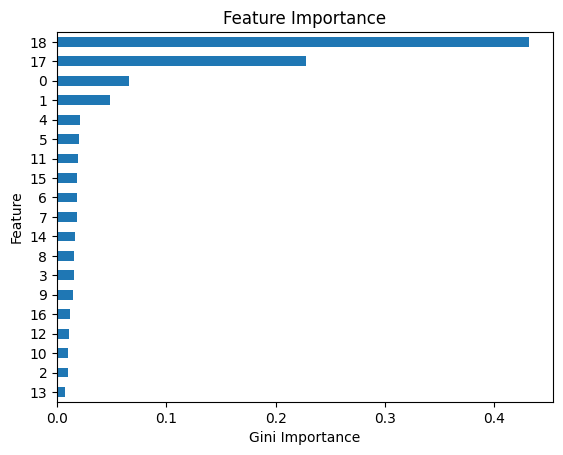

In [12]:
# Get feature names from training data
features = ingestion.data_train.drop(columns="math_score").columns
# Extract importances from model
importances = report[0].model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances).sort_values()
# Plot 10 most important features
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

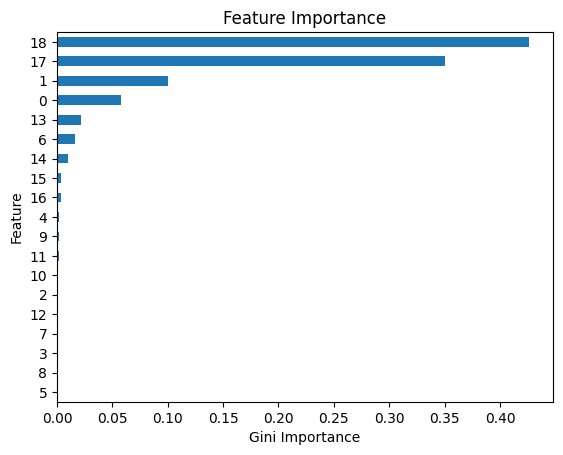

In [19]:
# Get feature names from training data
features = ingestion.data_train.drop(columns="math_score").columns
# Extract importances from model
importances = report[2].model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances).sort_values()
# Plot 10 most important features
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

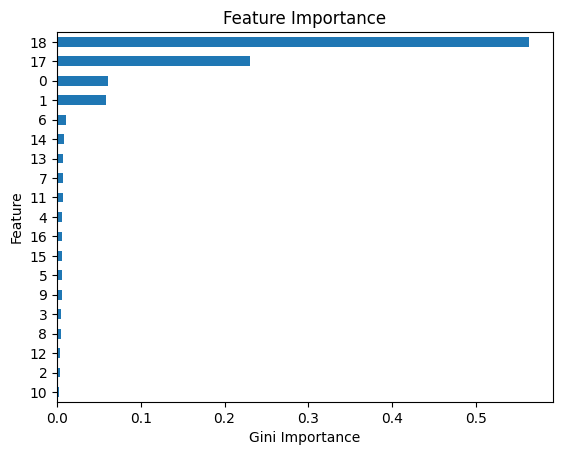

In [26]:
# Get feature names from training data
features = ingestion.data_train.drop(columns="math_score").columns
# Extract importances from model
importances = report[1].model.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances).sort_values()
# Plot 10 most important features
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [22]:
len(X_train)

800

In [25]:
X_train.shape[1]

19

In [13]:
evaluate.y_true

array([ 91,  53,  80,  74,  84,  81,  69,  54,  87,  51,  45,  30,  67,
        49,  85,  65,  53,  55,  48,  56,  79,  43,  45,  36,  80,  80,
        68,  40,  34,  49,  62,  71,  62,  76,  84,  45,  77,  69,  73,
         0,  82,  65,  67,  54,  90,  59,  74,  29,  89,  75,  71,  64,
        79,  48,  69,  69,  88,  58,  87,  85,  46,  71,  81,  58,  84,
        66,  55,  59,  58,  82,  66,  81,  58,  37,  63,  77,  85,  57,
        48,  51,  63,  45,  83,  60,  63,  62,  68,  60,  77,  28,  79,
       100,  69,  66,  19,  75,  60,  58,  69,  56,  73,  66,  67,  64,
        71,  70,  53,  75,  68,  44,  29,  71,  57,  45,  76,  61,  45,
        55,  73,  78,  50,  62,  81,  64,  64,  73,  73,  67,  61,  67,
        65,  80,  59,  88,  62,  33,  79,  84,  73,  41,  50,  58,  55,
        45,  88,  46,  51,  75,  49,  75,  74,  61,  62,  68,  78,  71,
        49,  59,  79,  51,  56,  76,  69,  51,  82,  73,  40,  93,  59,
        73,  85,  76,  77,  67,  61,  27,  54,  65,  87,  70,  5

In [14]:
evaluate.y_pred

array([78.64543944, 60.88919949, 79.64109021, 77.82650704, 87.94480526,
       78.52421296, 66.5895424 , 55.74583333, 75.23525987, 51.72633036,
       57.04196797, 44.53718528, 68.61041392, 57.15641685, 85.294868  ,
       71.14207763, 53.34086259, 52.2547824 , 51.53110392, 55.82354566,
       77.47975009, 42.99200204, 62.25731888, 39.75753782, 78.57810038,
       82.77910351, 79.08419926, 48.80688642, 36.17359553, 52.94709876,
       66.06356901, 72.2401615 , 61.93482338, 81.92457869, 84.0936709 ,
       48.32046846, 78.25217202, 70.42823424, 70.20281024, 13.37982104,
       79.78985905, 69.47487683, 69.14265028, 58.92429738, 83.4610849 ,
       63.80620425, 72.51636784, 29.93859485, 87.52204237, 72.64241151,
       77.10619252, 69.39277389, 81.58532721, 48.03909145, 67.67985085,
       70.76185178, 86.71498063, 60.36405248, 86.24336093, 82.78537699,
       51.46955716, 72.1160235 , 69.94332661, 55.81499237, 86.9113837 ,
       64.60623456, 64.72402236, 57.28961029, 58.89419838, 87.27

In [14]:
for value, name in zip([1, 2], ['a', 'b']):
    print(value, name, file=sys.stderr)

1 a
2 b


In [12]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method